In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### What are the features (variables) in the dataset?  
The features availablle in this dataset are the following:  
* Age
* Sex
* ChestPainType
* RestingBP
* Cholesterol
* FastingBS
* RestingECG
* MaxHR
* ExerciseAngina
* Oldpeak
* ST_Slope
* HeartDisease

In [17]:
dataset.shape

(918, 12)

#### Let's check our features datatype and if there are some missing values  
There are 918 samples in this dataset, each of them with 11 features and 1 target value  
In this case, the datatypes match the values of each feature so we don't need to cast their types.  
We can also observe that there are not missing values in the columns. 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### What is the distribution of the target variable (heart disease)?  
The distribution of the target variable is balanced.  
There are **~55%** of positive examples (people that had heart disease)  and **~44%** of negative examples (poeple that didn't have heart disease)  

In [45]:
dataset['HeartDisease'].value_counts(normalize=True)[0]

0.4466230936819172

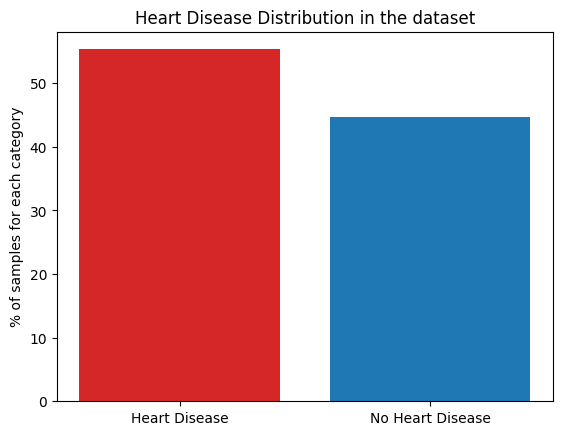

In [49]:
# Plot the target data distribution 
fig, ax = plt.subplots()

target = ['Heart Disease', 'No Heart Disease']
counts = [dataset['HeartDisease'].value_counts(normalize=True)[1]*100, dataset['HeartDisease'].value_counts(normalize=True)[0]*100]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(target, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('% of samples for each category')
ax.set_title('Heart Disease Distribution in the dataset')

plt.show()


### What is the distribution of categorical features?

There are more Male sammples in the dataset than Female. The dataset seems imbalanced based on this feature.  

**Number of samples by Sex**  
  
There are **725 Male** samples and **193 Female** samples

In [70]:
# number of samples in the dataset by Sex
dataset['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [81]:
# % of samples in the datset by Sex
dataset['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

#### Let's see which Sex has more Heart Diseases according to our Dataset  
It is observed that among the Female subset there are less Female samples with No heart disease. Different from the Male distribution where it is observed that there are more heart diseases among Males.

In [80]:
heart_disease_by_sex = dataset.groupby(by='Sex')['HeartDisease'].value_counts(normalize=True)
heart_disease_by_sex

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

[]

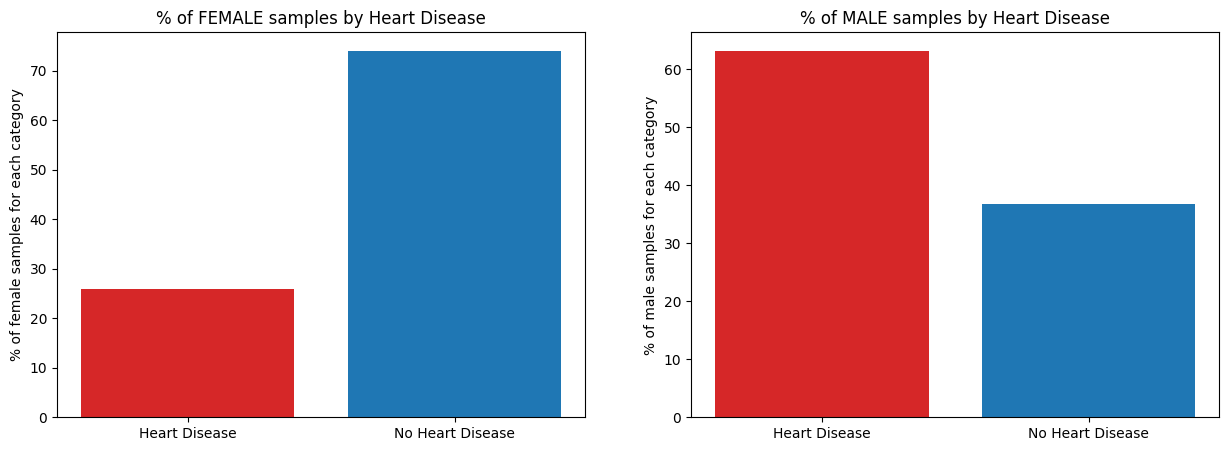

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

f_target = ['Heart Disease', 'No Heart Disease']
f_counts = [x*100 for x in [heart_disease_by_sex['F'][1], heart_disease_by_sex['F'][0]]]
m_target = ['Heart Disease', 'No Heart Disease']
m_counts = [x*100 for x in [heart_disease_by_sex['M'][1], heart_disease_by_sex['M'][0]]]

bar_colors = ['tab:red', 'tab:blue']

ax1.bar(f_target, f_counts, label=bar_labels, color=bar_colors)
ax1.set_ylabel('% of female samples for each category')
ax1.set_title('% of FEMALE samples by Heart Disease')

ax2.bar(m_target, m_counts, label=bar_labels, color=bar_colors)
ax2.set_ylabel('% of male samples for each category')
ax2.set_title('% of MALE samples by Heart Disease')

plt.plot()

In [6]:
dataset['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
dataset['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
dataset['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [9]:
dataset['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [10]:
dataset['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [11]:
dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [12]:
def get_age_range(age):
    if age < 0 or age > 90:
        return "Invalid age"
    
    lower_bound = (age // 10) * 10
    upper_bound = lower_bound + 9
    
    return f"{lower_bound}-{upper_bound}"

In [22]:
get_age_range(70)

'70-79'

<AxesSubplot:>

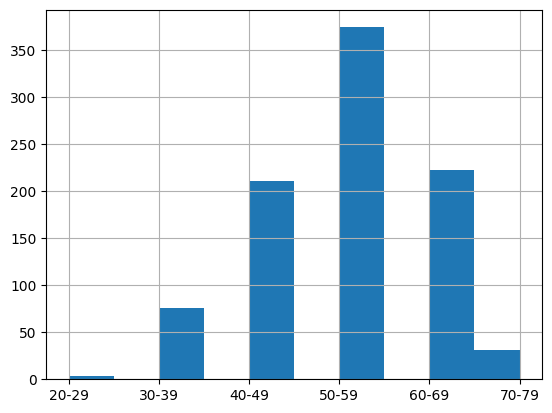

In [26]:
dataset['Age'].apply(get_age_range).sort_values().hist()

In [27]:
dataset['Age_range'] = dataset['Age'].apply(get_age_range)

In [28]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_range
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,40-49
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-49
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30-39
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-49
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-59


In [37]:
dataset.groupby(by=['Age_range'])['HeartDisease'].value_counts()

Age_range  HeartDisease
20-29      0                 4
30-39      0                50
           1                26
40-49      0               126
           1                85
50-59      1               212
           0               162
60-69      1               163
           0                59
70-79      1                22
           0                 9
Name: HeartDisease, dtype: int64

In [38]:
dataset.groupby(by=['Age_range'])['HeartDisease'].sum()

Age_range
20-29      0
30-39     26
40-49     85
50-59    212
60-69    163
70-79     22
Name: HeartDisease, dtype: int64

In [39]:
pd.get_dummies(dataset['ChestPainType'])

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [54]:
one_hot_for_CPT = OneHotEncoder()
one_hot_for_CPT.fit(dataset['ChestPainType'].values.reshape(-1,1))

OneHotEncoder()

In [59]:
one_hot_for_CPT.transform(dataset['ChestPainType'].values.reshape(-1,1)).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [58]:
one_hot_for_CPT.categories_

[array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)]